<a href="https://colab.research.google.com/github/sreebitbos/DataScienceProjects/blob/main/Neural_Network_Bank_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Project: Bank Churn Prediction

**Objective:** <br>

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

**Context:** <br>

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

**Data Description:** <br>

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc. <br>
Link to the Kaggle project site:https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

**Data Dictionary:**<br>

•	RowNumber: Row number.<br>
•	CustomerId: Unique identification key for different customers.<br>
•	Surname: Surname of the customer<br>
•	Credit Score: Credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.<br>
•	Geography: The country to which the customer belongs.<br>
•	Gender: The gender of the customer.<br>
•	Age: Age of the customer.<br>
•	Tenure: The period of time a customer has been associated with the bank.<br>
•	Balance: The account balance (the amount of money deposited in the bank account) of the customer.<br>
•	NumOfProducts: How many accounts, bank account affiliated products the person has.<br>
•	HasCrCard: Does the customer have a credit card through the bank?<br>
•	IsActiveMember: Subjective, but for the concept<br>
•	EstimatedSalary: Estimated salary of the customer.<br>
•	Exited: Did they leave the bank after all?<br>



# <a id='link3'>Exploratory Data Analysis </a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

**Import Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_profiling

**Load Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/data/bank.csv")
df.head()

RowNumber  CustomerId   Surname  ...  IsActiveMember EstimatedSalary Exited
0          1    15634602  Hargrave  ...               1       101348.88      1
1          2    15647311      Hill  ...               1       112542.58      0
2          3    15619304      Onio  ...               0       113931.57      1
3          4    15701354      Boni  ...               0        93826.63      0
4          5    15737888  Mitchell  ...               1        79084.10      0

[5 rows x 14 columns]

**Check the shape of the dataset**

In [ ]:
df.shape

(10000, 14)

**Get the info data types column wise**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Univariate Analysis**

In [ ]:
df.describe()

RowNumber    CustomerId  ...  EstimatedSalary        Exited
count  10000.00000  1.000000e+04  ...     10000.000000  10000.000000
mean    5000.50000  1.569094e+07  ...    100090.239881      0.203700
std     2886.89568  7.193619e+04  ...     57510.492818      0.402769
min        1.00000  1.556570e+07  ...        11.580000      0.000000
25%     2500.75000  1.562853e+07  ...     51002.110000      0.000000
50%     5000.50000  1.569074e+07  ...    100193.915000      0.000000
75%     7500.25000  1.575323e+07  ...    149388.247500      0.000000
max    10000.00000  1.581569e+07  ...    199992.480000      1.000000

[8 rows x 11 columns]

In [ ]:
df.describe().transpose()

count          mean  ...           75%          max
RowNumber        10000.0  5.000500e+03  ...  7.500250e+03     10000.00
CustomerId       10000.0  1.569094e+07  ...  1.575323e+07  15815690.00
CreditScore      10000.0  6.505288e+02  ...  7.180000e+02       850.00
Age              10000.0  3.892180e+01  ...  4.400000e+01        92.00
Tenure           10000.0  5.012800e+00  ...  7.000000e+00        10.00
Balance          10000.0  7.648589e+04  ...  1.276442e+05    250898.09
NumOfProducts    10000.0  1.530200e+00  ...  2.000000e+00         4.00
HasCrCard        10000.0  7.055000e-01  ...  1.000000e+00         1.00
IsActiveMember   10000.0  5.151000e-01  ...  1.000000e+00         1.00
EstimatedSalary  10000.0  1.000902e+05  ...  1.493882e+05    199992.48
Exited           10000.0  2.037000e-01  ...  0.000000e+00         1.00

[11 rows x 8 columns]

**Drop the columns which are unique for all users like IDs**

In [ ]:
#drop unnecessary attributes and display new dataset
df = df.drop(["RowNumber","CustomerId","Surname"], axis =1)

In [ ]:
df.head()

CreditScore Geography  Gender  ...  IsActiveMember  EstimatedSalary  Exited
0          619    France  Female  ...               1        101348.88       1
1          608     Spain  Female  ...               1        112542.58       0
2          502    France  Female  ...               0        113931.57       1
3          699    France  Female  ...               0         93826.63       0
4          850     Spain  Female  ...               1         79084.10       0

[5 rows x 11 columns]

In [ ]:
print("Rows : ",df.shape[0])
print("Columns  : ",df.shape[1])

Rows :  10000
Columns  :  11


**Check for Null Values**

In [ ]:
df.isnull().any()

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

**Print Unique Values**

In [ ]:
print ("\nUnique values :  \n",df.nunique())


Unique values :  
 CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64


**Check for data types**

In [ ]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

**Generate Profile Report**

In [ ]:
df.profile_report()

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Perform bivariate analysis with Data Visualization**

In [ ]:
import seaborn as sns
sns.set(palette="Set2")

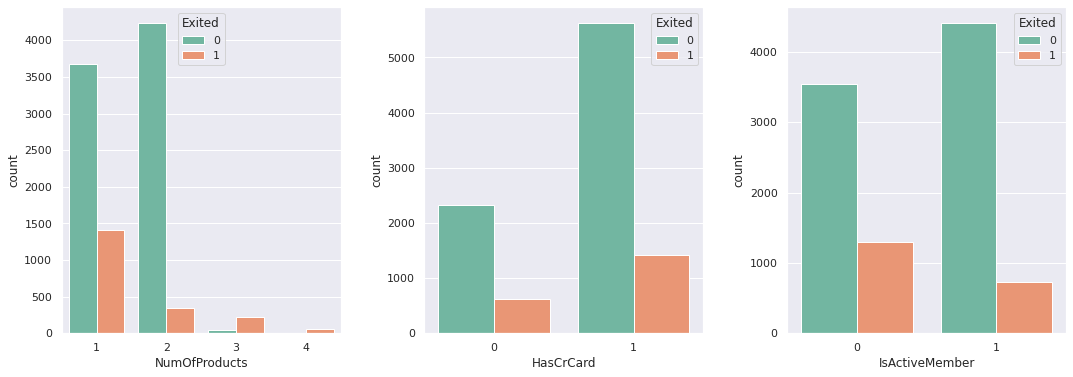

In [ ]:
_, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.countplot(x = "NumOfProducts", hue="Exited", data = df, ax= ax[0])
sns.countplot(x = "HasCrCard", hue="Exited", data = df, ax = ax[1])
sns.countplot(x = "IsActiveMember", hue="Exited", data = df, ax = ax[2])

**Insights** : Customer with 3 or 4 products are higher chances to Churn

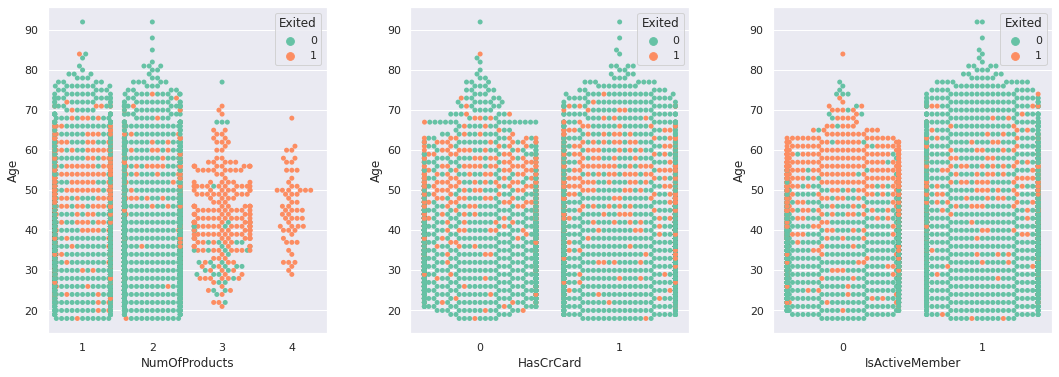

In [ ]:
_, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.swarmplot(x = "NumOfProducts", y = "Age", hue="Exited", data = df, ax= ax[0])
sns.swarmplot(x = "HasCrCard", y = "Age", data = df, hue="Exited", ax = ax[1])
sns.swarmplot(x = "IsActiveMember", y = "Age", hue="Exited", data = df, ax = ax[2])

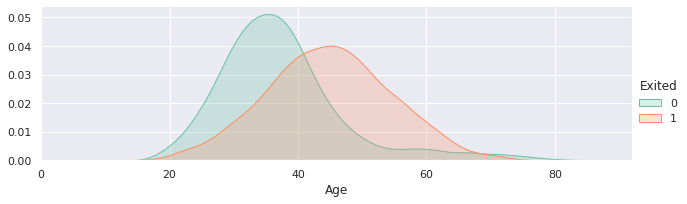

In [ ]:
facet = sns.FacetGrid(df, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Age",shade= True)
facet.set(xlim=(0, df["Age"].max()))
facet.add_legend()

plt.show()

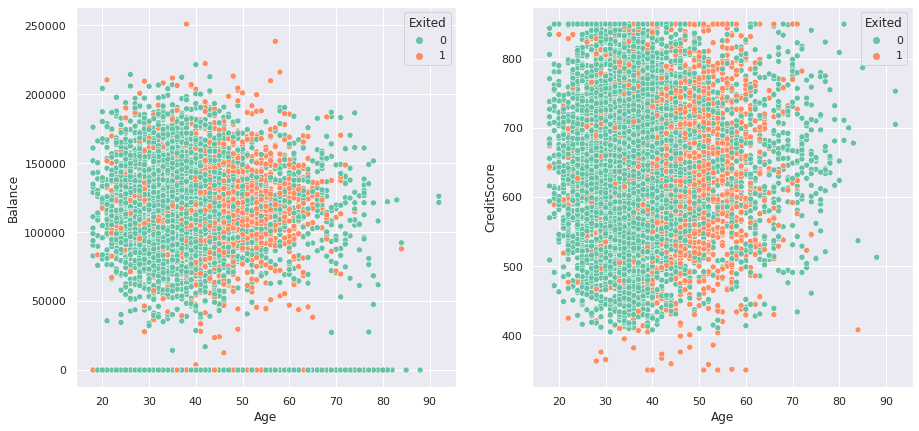

In [ ]:
_, ax =  plt.subplots(1, 2, figsize=(15, 7))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.scatterplot(x = "Age", y = "Balance", hue = "Exited", cmap = cmap, sizes = (10, 200), data = df, ax=ax[0])
sns.scatterplot(x = "Age", y = "CreditScore", hue = "Exited", cmap = cmap, sizes = (10, 200), data = df, ax=ax[1])

**Insights** :
- 40 to 70 years old customers are higher chances to churn

- Customer with CreditScore less then 400 are higher chances to churn

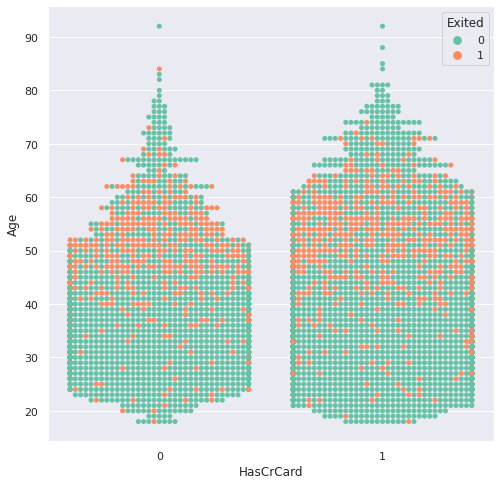

In [ ]:
plt.figure(figsize=(8, 8))
sns.swarmplot(x = "HasCrCard", y = "Age", data = df, hue="Exited")

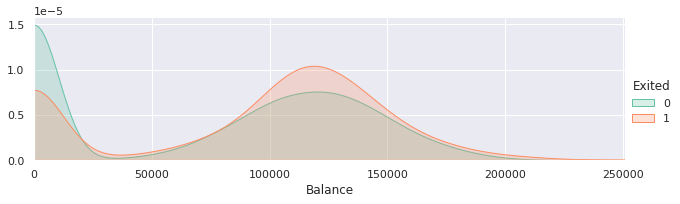

In [ ]:
facet = sns.FacetGrid(df, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Balance",shade= True)
facet.set(xlim=(0, df["Balance"].max()))
facet.add_legend()

plt.show()

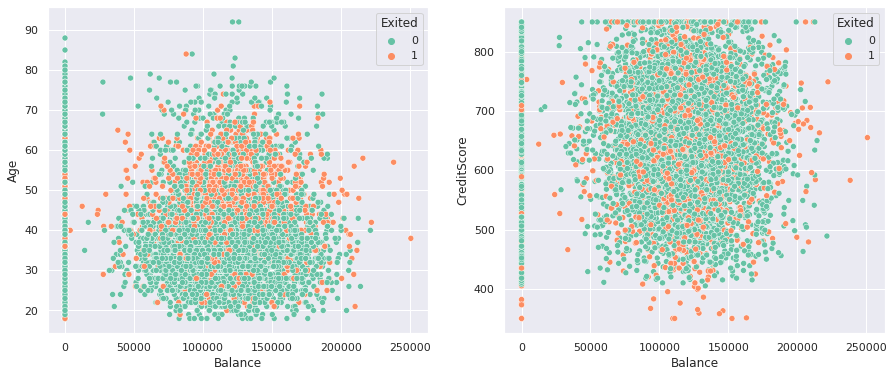

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.scatterplot(x = "Balance", y = "Age", data = df, hue="Exited", ax = ax[0])
sns.scatterplot(x = "Balance", y = "CreditScore", data = df, hue="Exited", ax = ax[1])

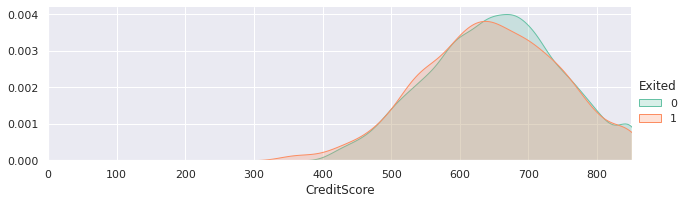

In [ ]:
facet = sns.FacetGrid(df, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"CreditScore",shade= True)
facet.set(xlim=(0, df["CreditScore"].max()))
facet.add_legend()

plt.show()

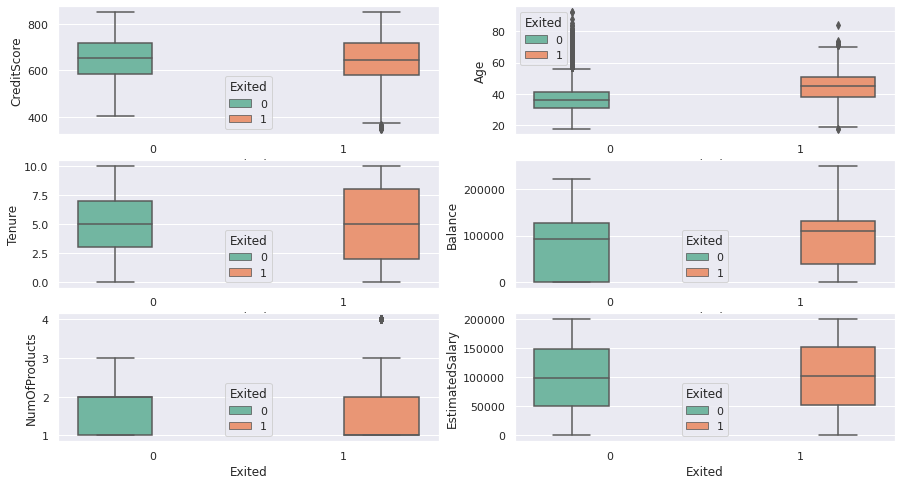

In [ ]:
fig, axarr = plt.subplots(3, 2, figsize=(15, 8))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

In [ ]:
df.groupby(['Exited']).mean()

CreditScore        Age  ...  IsActiveMember  EstimatedSalary
Exited                          ...                                 
0        651.853196  37.408389  ...        0.554565     99738.391772
1        645.351497  44.837997  ...        0.360825    101465.677531

[2 rows x 8 columns]

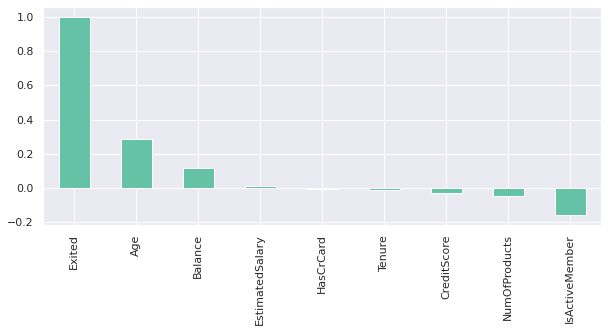

In [ ]:
plt.figure(figsize=(10,4))
df.corr()['Exited'].sort_values(ascending = False).plot(kind='bar')

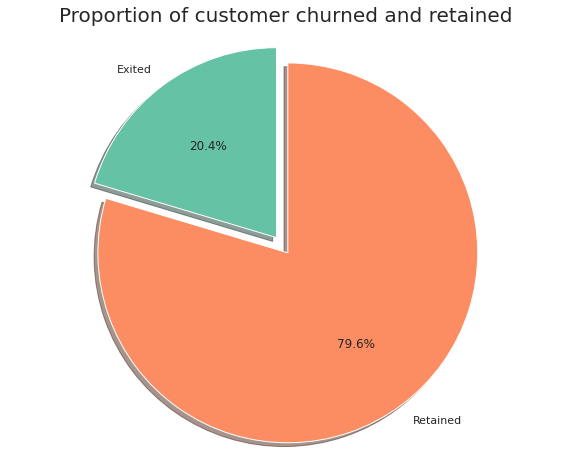

In [ ]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

**Insights** :So about 20% of the customers have churned. So the baseline model could be to predict that 20% of the customers will churn. Given 20% is a small number, we need to ensure that the chosen model does predict with great accuracy this 20% as it is of interest to the bank to identify and keep this bunch as opposed to accurately predicting the customers that are retained.

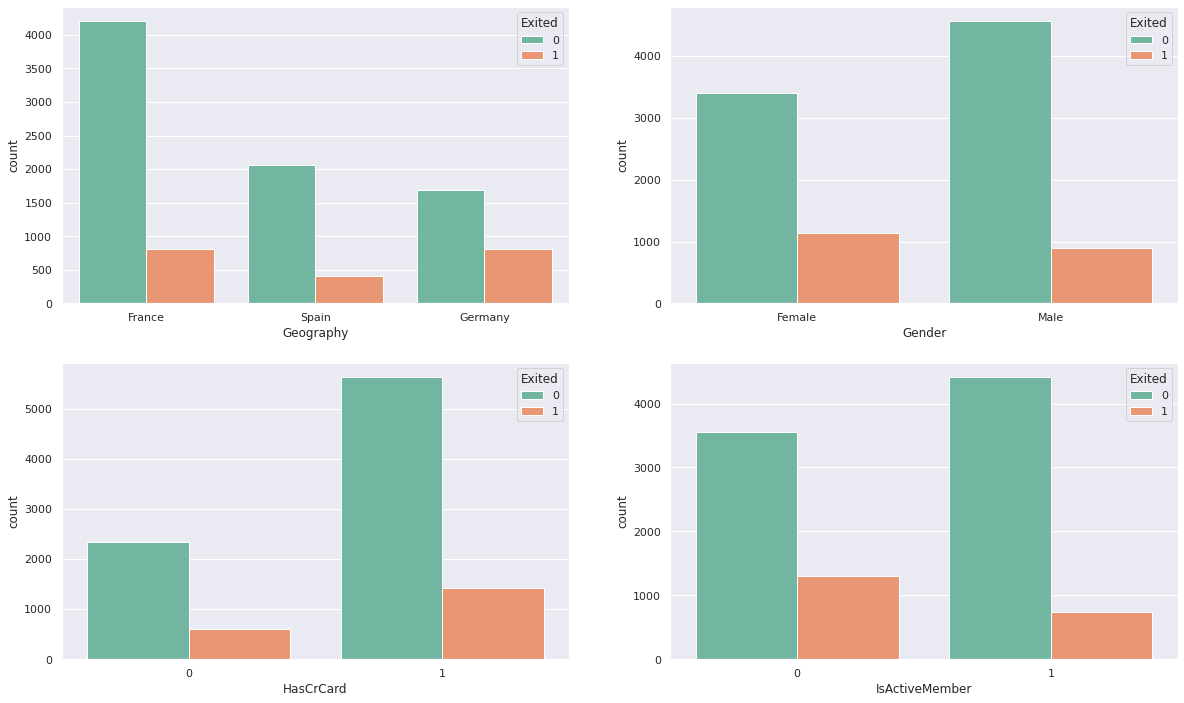

In [ ]:
#We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

**Insights from EDA/Bivariate Analysis** :
- Customers with low creditscore tend to churn,reasonable

- On average older customers are the most to churn,but its questionable

- Customers with high balance are churning probably they are getting attracted by other banks offer to raise the wealth and this corresponds with their estimatedsalary

- Tenure,creditcard and being active mean are not explicitly helping in this case to hightlight anything big

- Geographical location can determine the success of your business and can be a great tool to know how to play with your market as france show a huge number of customers with low churn.

- Apparently it is possible that customers without credit card are churning and it is obvious that the ones with it are not churning much.

- Female customers are churning than male this would be a factor of several things that can't be described without additional informations, also a great deal to consider gender so that the retention plan prepare promotions or offers based on affected gender,

- Not a suprise that inactive customers are churning than active ones

- Over all conclusion is that all attributes have its impact to the performance for instance Tenure and CreditScore are functions of age the more you get older the more the relation of a customer and a bank become stronger as sign of loyalty, and of course balances depends most of the case by your salary. These attributes are going to help us to engineer more case scenario by brin up new features that will help to punish negativity into predictions.

- Majority of the data is from persons from France. However, the proportion of churned customers is with inversely related to the population of customers alluding to the bank possibly having a problem (maybe not enough customer service resources allocated) in the areas where it has fewer clients.


**Checking Correlation**

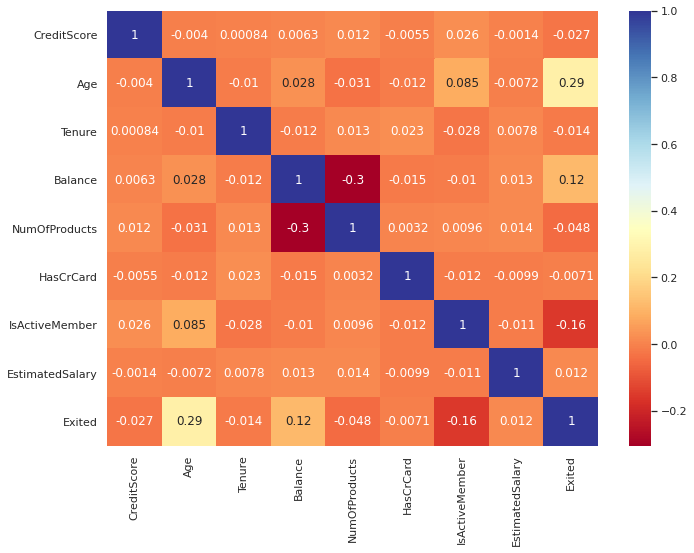

In [ ]:
plt.subplots(figsize=(11,8))
sns.heatmap(df.corr(), annot=True, cmap="RdYlBu")
plt.show()

**Outlier Detection**

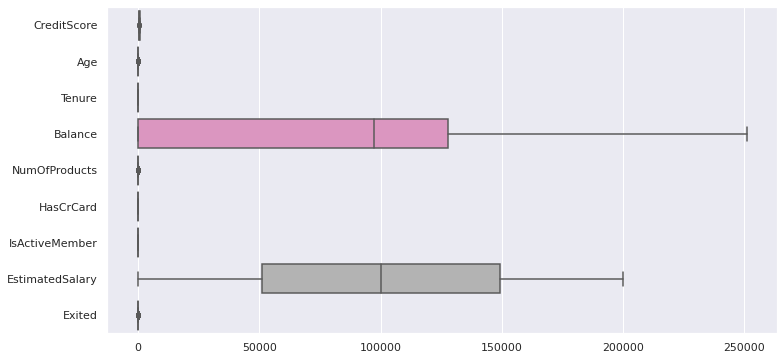

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, orient="h", palette="Set2", dodge=False)

# <a id='link3'>Feature Engineering </a>

**Prepare Dataset**

In [ ]:
dataset = pd.read_csv("/content/gdrive/My Drive/data/bank.csv")
# Exclude first 3 columns and the last column, because they are not useful.
# Index starts at 0.
x = dataset.iloc[:, 3:-1].values

# Just get the last column of dataset for the dependent variable.
y = dataset.iloc[:, -1].values

In [ ]:
print(x)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [ ]:
print(y)

[1 0 1 ... 1 1 0]


**Encoding Categorical Data**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Get all the rwos for the 2 column and encode them.
x[:, 2] = le.fit_transform(x[:, 2])

In [ ]:
print(x)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [ ]:
# We do one hot coding for geographical places because they have no relation among themselves like gender did.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [ ]:
print(x)

[[1.0 0.0 1.0 ... 1 1 101348.88]
 [1.0 0.0 0.0 ... 0 1 112542.58]
 [1.0 0.0 1.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 1.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 1.0 ... 1 0 38190.78]]


**Splitting the dataset into the Training set and Test set**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

**Apply Feature Scaling**

In [ ]:
# Apply feature scaling to all the features of both the training and the test set.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# Scaling fitted only to training set to avoid information leakage.
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# <a id='link3'>Build  ANN </a>

**Initiliaze ANN**

In [ ]:
import tensorflow as tf

In [ ]:
# Create a var to represtn the ANN as an instance of the sequential class that initializes our ANN.
ann = tf.keras.models.Sequential()

**Adding the input layer and the first hidden layer**

In [ ]:
# add() method belongs to the sequential class.
# add a fully connected layer (hidden), which will be a new object for the dense class.
# Argument for dense() -
# 'units' - There are called hyperparameters and are the hidden neurons.
# 'activation' - activation function in the hidden layer must be a rectifier activation function.
ann.add(tf.keras.layers.Dense(units=6, activation='relu')) # 'relu' - codename for rectifier activation function.

**Adding the second hidden layer**

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

**Adding the output layer**

In [ ]:
# As the output layer is binary we only need one neuron to match with the output layer, so 'units' = 1
# We need a sigmoid activation function, because it will give the predictions, as well as the probabilities.
# If we were predicting a categorical variable, activation = 'sigmax'
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# <a id='link3'>Train  ANN </a>

**Compile ANN**

In [ ]:
# Arguments -
# 'optimizer' - We choose 'adam' optimizer as it can perform stochastic gradient descent.
#  The stochastic gradient descent will optimize the weights to minimize the loss between the actual and the predicted values.
# 'loss' - When we are doing a binary classification when we are predicting a binary variable use 'binary_crossentropy' and
#  if we had categorical variable to predict we would have used 'categorical_crossentropy'
# 'metrics' -
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

**Train ANN on Training Dataset**

In [ ]:
# Batch learning, default batch size to be compared to the actual results = 32
ann.fit(X_train, y_train, batch_size=32, epochs=100)
# As we can see the accuracy converges around 0.86 around epoch = 20, so we didn't need 100 epochs.

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.5903 - accuracy: 0.7968
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4895 - accuracy: 0.7985
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4418 - accuracy: 0.8091
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4409 - accuracy: 0.7965
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4391 - accuracy: 0.7987
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4278 - accuracy: 0.8126
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4270 - accuracy: 0.8098
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4232 - accuracy: 0.8149
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4201 - accuracy: 0.8166
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4241 - accura

# <a id='link3'>Making Predictions and Evaluating the model  ANN </a>

**Predict Test Results**

In [ ]:
# These are predicted probabilities
y_predicted = ann.predict(X_test)
# Convert Predicted probabilities into binary outcome
y_predicted = (y_predicted > 0.5)
print(np.concatenate((y_predicted.reshape(len(y_predicted),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 0]]


**Making Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predicted)
print(cm)
accuracy_score(y_test, y_predicted)

[[1518   67]
 [ 209  206]]


0.862

Therefore, Accuracy = 86%

Total correct predictions that customers stay in bank = 1518

Total correct predictions that customers leave the bank = 206

Total incorrect predictions that customers stay in the bank = 209

Total incorrect predictions that customers leave in the bank = 67

# <a id='link3'>Making Predictions and Evaluating the model  using other ML Algorithms </a>

Create a training data set with the categorical variables and continuous variables. Include the 'Exited' target variable in the data.

In [ ]:
data = pd.read_csv("/content/gdrive/My Drive/data/bank.csv")

In [ ]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [ ]:
data.head()

CreditScore Geography  Gender  ...  IsActiveMember  EstimatedSalary  Exited
0          619    France  Female  ...               1        101348.88       1
1          608     Spain  Female  ...               1        112542.58       0
2          502    France  Female  ...               0        113931.57       1
3          699    France  Female  ...               0         93826.63       0
4          850     Spain  Female  ...               1         79084.10       0

[5 rows x 11 columns]

In [ ]:
# list of continuous and categorical variables/features

continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary']
categorical_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']

# separating the train and test data using a 80%-20% split

data_train = data.sample(frac=0.8, random_state=100)
data_test = data.drop(data_train.index)

# check the number of rows in each data set for verification

print('Number of rows in train data: ', len(data_train))
print('Number of rows in test data: ', len(data_test))

print()

data_train = data_train[['Exited'] + continuous_vars + categorical_vars]
data_train.head()

Number of rows in train data:  8000
Number of rows in test data:  2000



Exited  CreditScore  Age  ...  IsActiveMember  Geography  Gender
8018       1          632   23  ...               0    Germany    Male
9225       0          594   32  ...               1    Germany  Female
3854       0          687   33  ...               0    Germany    Male
2029       0          520   33  ...               1     France    Male
3539       0          667   42  ...               0     France    Male

[5 rows x 11 columns]

In [ ]:
# turning 0 values of numerical categorical features into -1
# to introduce negative relation in the calculations

data_train.loc[data_train.HasCrCard == 0, 'HasCrCard'] = -1
data_train.loc[data_train.IsActiveMember == 0, 'IsActiveMember'] = -1

data_train.head()

Exited  CreditScore  Age  ...  IsActiveMember  Geography  Gender
8018       1          632   23  ...              -1    Germany    Male
9225       0          594   32  ...               1    Germany  Female
3854       0          687   33  ...              -1    Germany    Male
2029       0          520   33  ...               1     France    Male
3539       0          667   42  ...              -1     France    Male

[5 rows x 11 columns]

In [ ]:
# list of categorical variables

var_list = ['Geography', 'Gender']

# turning the categorical variables into one-hot vectors

for var in var_list:
  for val in data_train[var].unique():
    data_train[var + '_' + val] = np.where(data_train[var] == val, 1, -1)

data_train = data_train.drop(var_list, axis=1)

data_train.head()

Exited  CreditScore  Age  ...  Geography_Spain  Gender_Male  Gender_Female
8018       1          632   23  ...               -1            1             -1
9225       0          594   32  ...               -1           -1              1
3854       0          687   33  ...               -1            1             -1
2029       0          520   33  ...               -1            1             -1
3539       0          667   42  ...               -1            1             -1

[5 rows x 14 columns]

In [ ]:
min_values = data_train[continuous_vars].min()
max_values = data_train[continuous_vars].max()

data_train[continuous_vars] = (data_train[continuous_vars] - min_values) / (max_values - min_values)
data_train.head()

Exited  CreditScore  ...  Gender_Male  Gender_Female
8018       1        0.564  ...            1             -1
9225       0        0.488  ...           -1              1
3854       0        0.674  ...            1             -1
2029       0        0.340  ...            1             -1
3539       0        0.634  ...            1             -1

[5 rows x 14 columns]

**Machine Learning classifiers (selecting optimal parameters)**

Try to train different machine learning classification models to our data. Once we get the model details for each of the models, we can select the best model from them for our training and testing purposes.

These are the models that we will try to use now:

Stochastic Gradient Descent (SGD) classifier
Logistic Regression
Support Vector Machines (SVM) with different kernel methods
Linear kernel
RBF kernel
Poly kernel
Random Forest Classifier
Extreme Gradient Boost Classifier (XGBoost)

In [ ]:
# important libraries

from sklearn.model_selection import GridSearchCV

# models

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# metrics

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import time

In [ ]:
# this method will show us the details of each model
# which will help us in deciding the best model

def best_model(model):
  print(model.best_score_)
  print(model.best_params_)
  print(model.best_estimator_)

In [ ]:
# SGD classifier
start_time = time.time()

parameters = {'loss': ['hinge', 'log'],
              'max_iter': [50, 100, 200, 300],
              'fit_intercept':[True],
              'penalty':['l2'],
              'tol':[0.00001, 0.0001, 0.000001]}

SGD_grid_model = GridSearchCV(SGDClassifier(),
                              param_grid=parameters,
                              cv=10,
                              refit=True,
                              verbose=0)

SGD_grid_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

print('[INFO] Time taken: %.1f seconds.\n' % (time.time() - start_time))

best_model(SGD_grid_model)

[INFO] Time taken: 24.3 seconds.

0.81375
{'fit_intercept': True, 'loss': 'log', 'max_iter': 50, 'penalty': 'l2', 'tol': 0.0001}
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=50,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.0001,
              validation_fraction=0.1, verbose=0, warm_start=False)


In [ ]:
# Logistic Regression classifier

start_time = time.time()

parameters = {'C': [0.1, 0.5, 1, 5, 10, 50, 100],
              'max_iter': [50, 100, 200, 300],
              'fit_intercept':[True],
              'intercept_scaling':[1],
              'penalty':['l2'],
              'tol':[0.00001, 0.0001, 0.000001]}

LR_grid_model = GridSearchCV(LogisticRegression(),
                             param_grid=parameters,
                             cv=10,
                             refit=True,
                             verbose=0)

LR_grid_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

print('[INFO] Time taken: %.1f seconds.\n' % (time.time() - start_time))

best_model(LR_grid_model)

[INFO] Time taken: 60.9 seconds.

0.813875
{'C': 0.1, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 50, 'penalty': 'l2', 'tol': 1e-05}
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=1e-05, verbose=0,
                   warm_start=False)


In [ ]:
# Support Vector Machines (RBF kernel)

start_time = time.time()

parameters = {'C': [1, 10, 50, 100],
              'gamma': [0.1, 0.01, 0.001],
              'probability': [True],
              'kernel': ['rbf']}

SVM_rbf_grid_model = GridSearchCV(SVC(),
                                  parameters,
                                  cv=5,
                                  refit=True,
                                  verbose=0)

SVM_rbf_grid_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

print('[INFO] Time taken: %.1f seconds.\n' % (time.time() - start_time))

best_model(SVM_rbf_grid_model)

[INFO] Time taken: 464.3 seconds.

0.8466249999999998
{'C': 100, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [ ]:
# Support Vector Machines (Poly kernel)

start_time = time.time()

parameters = {'C': [1, 10, 50, 100],
              'gamma': [0.1, 0.01, 0.001],
              'probability': [True],
              'kernel': ['poly'],
              'degree': [2, 3]}

SVM_poly_grid_model = GridSearchCV(SVC(),
                                   parameters,
                                   cv=5,
                                   refit=True,
                                   verbose=0)

SVM_poly_grid_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

print('[INFO] Time taken: %.1f seconds.\n' % (time.time() - start_time))

best_model(SVM_poly_grid_model)

[INFO] Time taken: 561.0 seconds.

0.852125
{'C': 100, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly', 'probability': True}
SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [ ]:
# Random Forest Classifier

start_time = time.time()

parameters = {'max_depth': [6, 7, 8, 9, 10],
              'max_features': [5, 6, 7, 8, 9],
              'n_estimators':[10, 50, 100],
              'min_samples_split': [3, 5, 6, 7]}

RF_grid_model = GridSearchCV(RandomForestClassifier(),
                             parameters,
                             cv=10,
                             refit=True,
                             verbose=0)

RF_grid_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

print('[INFO] Time taken: %.1f seconds.\n' % (time.time() - start_time))

best_model(RF_grid_model)

[INFO] Time taken: 2152.8 seconds.

0.8654999999999999
{'max_depth': 9, 'max_features': 9, 'min_samples_split': 6, 'n_estimators': 50}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features=9,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [ ]:

# Extreme Gradient Boost (XGBoost) classifier

start_time = time.time()

parameters = {'max_depth': [5, 6, 7, 8],
              'gamma': [0.01, 0.001, 0.001],
              'min_child_weight': [1, 5, 10],
              'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
              'n_estimators': [5, 10, 20, 100]}

XGB_grid_model = GridSearchCV(XGBClassifier(),
                              parameters,
                              cv=10,
                              refit=True,
                              verbose=0)

XGB_grid_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

print('[INFO] Time taken: %.1f seconds.\n' % (time.time() - start_time))

best_model(XGB_grid_model)

[INFO] Time taken: 2450.2 seconds.

0.8630000000000001
{'gamma': 0.001, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.001,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


**Machine Learning classifiers (fitting the best models)**

In [ ]:
# SGD classifier

sgd_model = SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                          early_stopping=False, epsilon=0.1, eta0=0.0,
                          fit_intercept=True, l1_ratio=0.15,
                          learning_rate='optimal', loss='log', max_iter=300,
                          n_iter_no_change=5, n_jobs=None, penalty='l2',
                          power_t=0.5, random_state=None, shuffle=True,
                          tol=1e-06, validation_fraction=0.1, verbose=0,
                          warm_start=False)

sgd_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=300,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=1e-06,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
# Logistic Regression

lr_model = LogisticRegression(C=0.1, class_weight=None, dual=False,
                              fit_intercept=True, intercept_scaling=1,
                              l1_ratio=None, max_iter=50, multi_class='auto',
                              n_jobs=None, penalty='l2', random_state=None,
                              solver='lbfgs', tol=1e-05, verbose=0,
                              warm_start=False)

lr_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=1e-05, verbose=0,
                   warm_start=False)

In [ ]:
# SVM (RBF kernel)

svm_rbf_model = SVC(C=100, break_ties=False, cache_size=200, class_weight=None,
                    coef0=0.0, decision_function_shape='ovr', degree=3,
                    gamma=0.1, kernel='rbf', max_iter=-1, probability=True,
                    random_state=None, shrinking=True, tol=0.001,
                    verbose=False)

svm_rbf_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# SVM (Poly kernel)

svm_poly_model = SVC(C=100, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=2,
                     gamma=0.1, kernel='poly', max_iter=-1, probability=True,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False)

svm_poly_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# Random Forest classifier

rf_model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                  class_weight=None, criterion='gini',
                                  max_depth=9, max_features=9,
                                  max_leaf_nodes=None, max_samples=None,
                                  min_impurity_decrease=0.0,
                                  min_impurity_split=None, min_samples_leaf=1,
                                  min_samples_split=7,
                                  min_weight_fraction_leaf=0.0, n_estimators=50,
                                  n_jobs=None, oob_score=False,
                                  random_state=None, verbose=0,
                                  warm_start=False)

rf_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features=9,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# XGBoost classifier

xgb_model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                          colsample_bynode=1, colsample_bytree=1, gamma=0.001,
                          learning_rate=0.1, max_delta_step=0, max_depth=5,
                          min_child_weight=1, missing=None, n_estimators=100,
                          n_jobs=1, nthread=None, objective='binary:logistic',
                          random_state=0, reg_alpha=0, reg_lambda=1,
                          scale_pos_weight=1, seed=None, silent=None,
                          subsample=1, verbosity=1)

xgb_model.fit(data_train.loc[:, data_train.columns != 'Exited'], data_train.Exited)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.001,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

**ML Classifiers - Visualize results**

In [ ]:
print('[INFO] SGD classifier:\n')
print(classification_report(data_train.Exited, sgd_model.predict(data_train.loc[:, data_train.columns != 'Exited'])))

[INFO] SGD classifier:

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      6382
           1       0.55      0.24      0.33      1618

    accuracy                           0.81      8000
   macro avg       0.69      0.59      0.61      8000
weighted avg       0.77      0.81      0.77      8000



In [ ]:
print('[INFO] Logistic Regression classifier:\n')
print(classification_report(data_train.Exited, lr_model.predict(data_train.loc[:, data_train.columns != 'Exited'])))

[INFO] Logistic Regression classifier:

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      6382
           1       0.69      0.15      0.25      1618

    accuracy                           0.81      8000
   macro avg       0.75      0.57      0.57      8000
weighted avg       0.79      0.81      0.76      8000



In [ ]:
print('[INFO] SVM (RBF) classifier:\n')
print(classification_report(data_train.Exited, svm_rbf_model.predict(data_train.loc[:, data_train.columns != 'Exited'])))

[INFO] SVM (RBF) classifier:

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      6382
           1       0.84      0.38      0.53      1618

    accuracy                           0.86      8000
   macro avg       0.85      0.68      0.72      8000
weighted avg       0.86      0.86      0.84      8000



In [ ]:
print('[INFO] SVM (Poly) classifier:\n')
print(classification_report(data_train.Exited, svm_poly_model.predict(data_train.loc[:, data_train.columns != 'Exited'])))


[INFO] SVM (Poly) classifier:

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      6382
           1       0.81      0.36      0.50      1618

    accuracy                           0.85      8000
   macro avg       0.83      0.67      0.71      8000
weighted avg       0.85      0.85      0.83      8000



In [ ]:
print('[INFO] Random Forest classifier:\n')
print(classification_report(data_train.Exited, rf_model.predict(data_train.loc[:, data_train.columns != 'Exited'])))

[INFO] Random Forest classifier:

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      6382
           1       0.89      0.57      0.69      1618

    accuracy                           0.90      8000
   macro avg       0.89      0.78      0.82      8000
weighted avg       0.90      0.90      0.89      8000



In [ ]:
print('[INFO] Extreme Gradient Boost (XGB) classifier:\n')
print(classification_report(data_train.Exited, xgb_model.predict(data_train.loc[:, data_train.columns != 'Exited'])))


[INFO] Extreme Gradient Boost (XGB) classifier:

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      6382
           1       0.85      0.54      0.66      1618

    accuracy                           0.89      8000
   macro avg       0.87      0.76      0.80      8000
weighted avg       0.88      0.89      0.88      8000



**Visualize ROC & AUC**

In [ ]:
%matplotlib inline

In [ ]:
def get_roc(y, predict_vals, prob_values):
  roc_score = roc_auc_score(y, predict_vals)
  false_positives, true_positives, _ = roc_curve(y, prob_values)
  return (roc_score, false_positives, true_positives)

In [ ]:
y = data_train.Exited
X = data_train.loc[:, data_train.columns != 'Exited']

roc_sgd, false_sgd, true_sgd = get_roc(y, sgd_model.predict(X), sgd_model.predict_proba(X)[:, 1])
roc_lr, false_lr, true_lr = get_roc(y, lr_model.predict(X), lr_model.predict_proba(X)[:, 1])
roc_svm_rbf, false_svm_rbf, true_svm_rbf = get_roc(y, svm_rbf_model.predict(X), svm_rbf_model.predict_proba(X)[:, 1])
roc_svm_poly, false_svm_poly, true_svm_poly = get_roc(y, svm_poly_model.predict(X), svm_poly_model.predict_proba(X)[:, 1])
roc_rf, false_rf, true_rf = get_roc(y, rf_model.predict(X), rf_model.predict_proba(X)[:, 1])
roc_xgb, false_xgb, true_xgb = get_roc(y, xgb_model.predict(X), xgb_model.predict_proba(X)[:, 1])

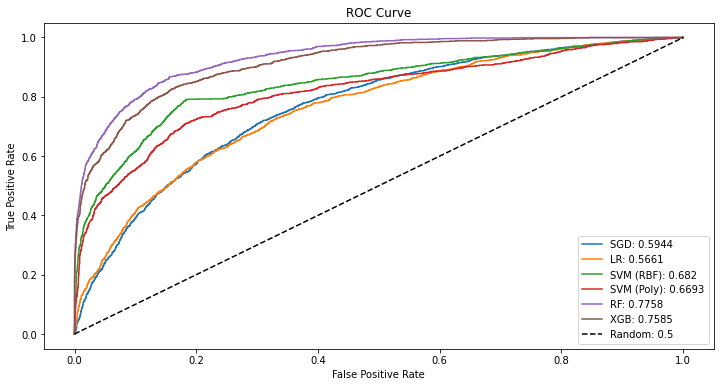

In [ ]:
plt.figure(figsize = (12,6), linewidth = 2)

plt.plot(false_sgd, true_sgd, label = 'SGD: ' + str(round(roc_sgd, 4)))
plt.plot(false_lr, true_lr, label = 'LR: ' + str(round(roc_lr, 4)))
plt.plot(false_svm_rbf, true_svm_rbf, label = 'SVM (RBF): ' + str(round(roc_svm_rbf, 4)))
plt.plot(false_svm_poly, true_svm_poly, label = 'SVM (Poly): ' + str(round(roc_svm_poly, 4)))
plt.plot(false_rf, true_rf, label = 'RF: ' + str(round(roc_rf, 4)))
plt.plot(false_xgb, true_xgb, label = 'XGB: ' + str(round(roc_xgb, 4)))

plt.plot([0, 1], [0, 1], 'k--', label = 'Random: 0.5')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')

plt.show()

**ML Classifier - Test Accuracy**

In [ ]:
data_test = data_test[['Exited'] + continuous_vars + categorical_vars]

# Change the 0 in categorical variables to -1

data_test.loc[data_test.HasCrCard == 0, 'HasCrCard'] = -1
data_test.loc[data_test.IsActiveMember == 0, 'IsActiveMember'] = -1

# One hot encode the categorical variables

var_list = ['Geography', 'Gender']

for var in var_list:
  for val in data_test[var].unique():
    data_test[var + '_' + val] = np.where(data_test[var] == val, 1, -1)

data_test = data_test.drop(var_list, axis=1)

# Ensure that all one hot encoded variables that appear in the train data appear in the subsequent data

columns_list = list(set(data_train.columns) - set(data_test.columns))

for column in columns_list:
    data_test[str(column)] = -1

# MinMax scaling of the continuous variables based on min and max from the train data

data_test[continuous_vars] = (data_test[continuous_vars] - min_values) / (max_values - min_values)

# Ensure that The variables are ordered in the same way as was ordered in the train set

data_test = data_test[data_train.columns]

In [ ]:
# mask infinite values and delete not available or missing values from columns

data_test = data_test.mask(np.isinf(data_test))
data_test = data_test.dropna()

print(data_test.shape)

(2000, 14)


In [ ]:
# classification report for the test data

print(classification_report(data_test.Exited,  rf_model.predict(data_test.loc[:, data_test.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1581
           1       0.81      0.49      0.61       419

    accuracy                           0.87      2000
   macro avg       0.84      0.73      0.77      2000
weighted avg       0.86      0.87      0.86      2000



In [ ]:

# calculate the ROC score, false positives, and true positives

roc_rf_test, false_rf_test, true_rf_test = get_roc(data_test.Exited,
                                                   rf_model.predict(data_test.loc[:, data_test.columns != 'Exited']),
                                                   rf_model.predict_proba(data_test.loc[:, data_test.columns != 'Exited'])[:,1])

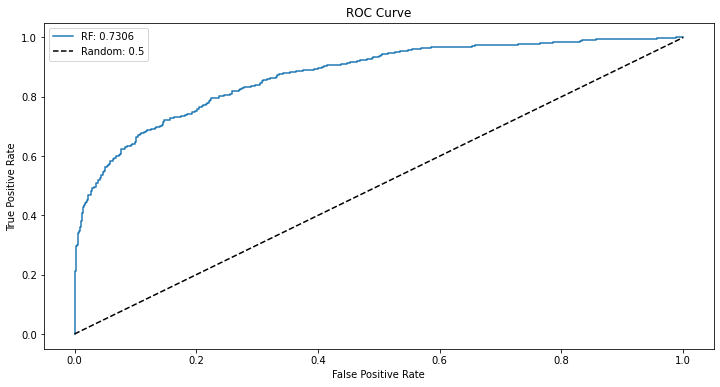

In [ ]:
plt.figure(figsize = (12,6), linewidth = 2)

plt.plot(false_rf_test,
         true_rf_test,
         label = 'RF: ' + str(round(roc_rf_test, 4)))

plt.plot([0, 1], [0, 1], 'k--', label = 'Random: 0.5')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')

plt.show()

**Conclusion**


The precision of the model on previousy unseen test data is
slightly higher with regard to predicting 1's i.e. those customers that churn. However, in as much as the model has a high accuracy, it still misses about half of those who end up churning. This could be imprved by providing retraining the model with more data over time